In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [124]:
data = pd.read_csv('dataset_insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [125]:
data.shape

(1338, 7)

In [126]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [151]:
data['bmi'] = data['bmi'].astype('int')
data['charges'] = data['charges'].astype('int')
data['sex'] = data['sex'].astype('category')
data['children'] = data['children'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   category
 2   bmi         1338 non-null   int64   
 3   children    1338 non-null   category
 4   smoker      1338 non-null   category
 5   region      1338 non-null   category
 6   charges     1338 non-null   int64   
 7   SMOKER_NEW  1338 non-null   int8    
dtypes: category(4), int64(3), int8(1)
memory usage: 38.7 KB


In [130]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27,0,yes,southwest,16884
1,18,male,33,1,no,southeast,1725
2,28,male,33,3,no,southeast,4449
3,33,male,22,0,no,northwest,21984
4,32,male,28,0,no,northwest,3866


In [131]:
def outlier(df):
    list_outlier_col = ['bmi','charges'] #colonnes concernées
    for i in list_outlier_col :
        #limite superieure
        upper_limit = df[i].quantile(0.95)
        #limite inferieure
        lower_limit = df[i].quantile(0.05)
        df[i] = df[i].clip(lower = lower_limit, upper =  upper_limit)
    return df

In [132]:
data = outlier(data)

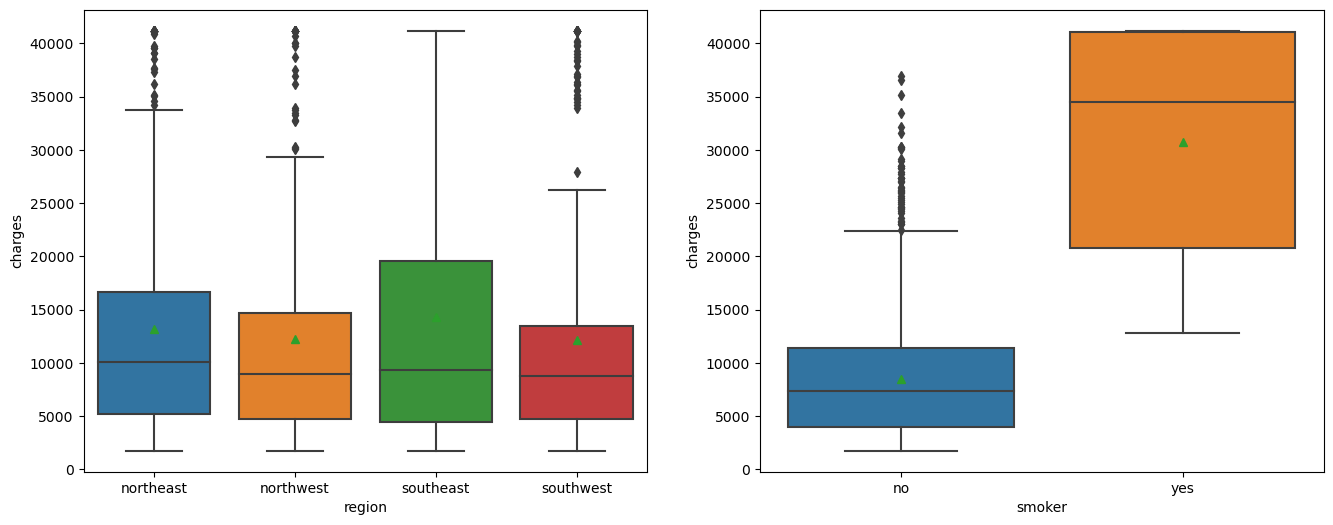

In [133]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["region"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["smoker"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

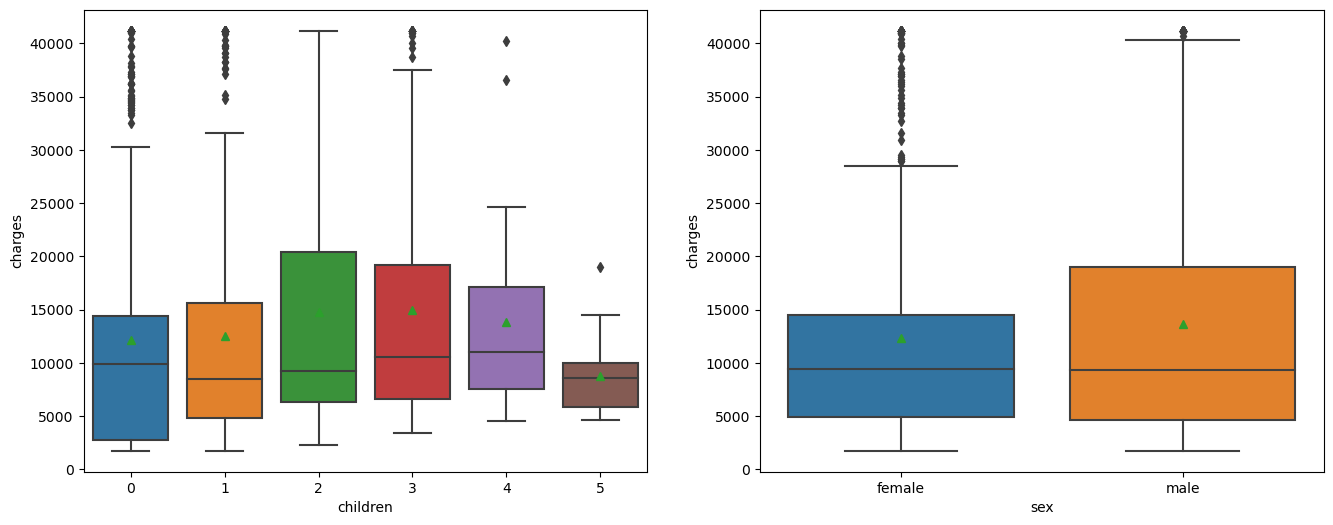

In [134]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["children"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["sex"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

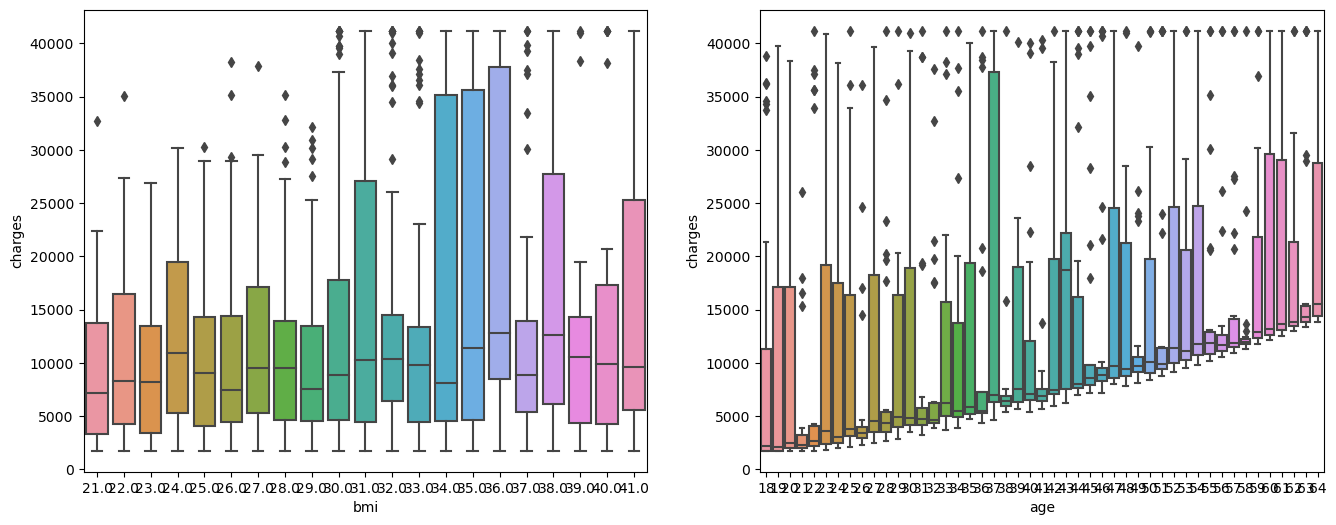

In [135]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["bmi"], y = data["charges"], data= data, ax=axes[0]);
sns.boxplot(x= data["age"], y = data["charges"], data= data, ax=axes[1]);

In [109]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(data['age'], data['charges']), index=['pearsonr_coeff','p-value'], columns = ['resultat_test'])

,resultat_test
pearsonr_coeff,2.975903e-01
p-value,9.128843e-29


In [83]:
def rapport_corr(x,y):
    '''x est une variable qualitative
    y est une variable quantitative
    '''
    somme = 0
    for facteur in x.value_counts().index:
        ind = x[x == facteur].dropna(axis=0).index
        classe = y.iloc[ind,]
        somme = somme + len(classe)*np.sum((np.mean(classe)-np.mean(y))**2)
        y_ecart = np.sum((y-np.mean(y))**2)
        rc = somme/y_ecart
    #rc.index = ['Rapport de Correlation']
    return rc


In [93]:
rapport_corr(data.children,data.charges)

0.012224690571266026

In [92]:
rapport_corr(data.sex,data.charges)

0.0032825302915894103

In [113]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.0,0,yes,southwest,16884.00
1,18,male,33.0,1,no,southeast,1757.35
2,28,male,33.0,3,no,southeast,4449.00
3,33,male,22.0,0,no,northwest,21984.00
4,32,male,28.0,0,no,northwest,3866.00


In [201]:
data_with_get_dummies = data.copy()
data_with_ohe = data.copy()
data_with_get_dummies = pd.get_dummies(data_with_get_dummies, prefix=None, prefix_sep='_', dummy_na=False, columns=['age', 'smoker','sex','children'], sparse=False, drop_first=False, dtype=None)

In [202]:
data_with_get_dummies.head()

,bmi,region,charges,SMOKER_NEW,SEX_NEW,age_18,age_19,age_20,age_21,age_22,...,smoker_no,smoker_yes,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5
0,27,southwest,16884,1,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,33,southeast,1757,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,33,southeast,4449,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,22,northwest,21984,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,28,northwest,3866,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [203]:
data_with_get_dummies.drop(columns=['SMOKER_NEW'], inplace=True)
data_with_get_dummies.drop(columns=['SEX_NEW'], inplace=True)
data_with_get_dummies.head(10)

,bmi,region,charges,age_18,age_19,age_20,age_21,age_22,age_23,age_24,...,smoker_no,smoker_yes,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5
0,27,southwest,16884,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,33,southeast,1757,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,33,southeast,4449,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,22,northwest,21984,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,28,northwest,3866,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
5,25,southeast,3756,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
6,33,southeast,8240,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
7,27,northwest,7281,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
8,29,northeast,6406,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
9,25,northwest,28923,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [204]:
x_ohe_train, x_ohe_test, y_ohe_train, y_ohe_test = train_test_split(data_with_get_dummies.iloc[:,5:], ohe_df[["charges"]], test_size=0.2, random_state=2)

regr = linear_model.LinearRegression()

regr.fit(x_ohe_train , y_ohe_train)

LinearRegression()

In [205]:
y_pred = regr.predict(x_ohe_test)
print('R2_score: ', r2_score(y_ohe_test, y_pred))
print('MAE : ',mean_absolute_error(y_ohe_test, y_pred))
print('MSE : ',mean_squared_error(y_ohe_test, y_pred))

R2_score:  0.7285303399733387
MAE :  3960.507462686567
MSE :  35214197.38059702


In [207]:
y_pred2 = regr.predict(x_ohe_train)
print('R2_score: ', r2_score(y_ohe_train, y_pred2))

R2_score:  0.7466644866137147
